In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [70]:
tem=pd.read_csv('/Users/drram/Documents/Bias_correction_ucl.csv')
tem.head()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,2013-06-30,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,2013-06-30,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,2013-06-30,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,2013-06-30,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,2013-06-30,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5


In [71]:
tem.shape

(7752, 25)

In [72]:
tem.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7752 entries, 0 to 7751
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7750 non-null   float64
 1   Date              7750 non-null   object 
 2   Present_Tmax      7682 non-null   float64
 3   Present_Tmin      7682 non-null   float64
 4   LDAPS_RHmin       7677 non-null   float64
 5   LDAPS_RHmax       7677 non-null   float64
 6   LDAPS_Tmax_lapse  7677 non-null   float64
 7   LDAPS_Tmin_lapse  7677 non-null   float64
 8   LDAPS_WS          7677 non-null   float64
 9   LDAPS_LH          7677 non-null   float64
 10  LDAPS_CC1         7677 non-null   float64
 11  LDAPS_CC2         7677 non-null   float64
 12  LDAPS_CC3         7677 non-null   float64
 13  LDAPS_CC4         7677 non-null   float64
 14  LDAPS_PPT1        7677 non-null   float64
 15  LDAPS_PPT2        7677 non-null   float64
 16  LDAPS_PPT3        7677 non-null   float64


In [9]:
#checking dtypes
tem.dtypes

station             float64
Date                 object
Present_Tmax        float64
Present_Tmin        float64
LDAPS_RHmin         float64
LDAPS_RHmax         float64
LDAPS_Tmax_lapse    float64
LDAPS_Tmin_lapse    float64
LDAPS_WS            float64
LDAPS_LH            float64
LDAPS_CC1           float64
LDAPS_CC2           float64
LDAPS_CC3           float64
LDAPS_CC4           float64
LDAPS_PPT1          float64
LDAPS_PPT2          float64
LDAPS_PPT3          float64
LDAPS_PPT4          float64
lat                 float64
lon                 float64
DEM                 float64
Slope               float64
Solar radiation     float64
Next_Tmax           float64
Next_Tmin           float64
dtype: object

In [10]:
#checking null values
tem.isnull().sum()

station              2
Date                 2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

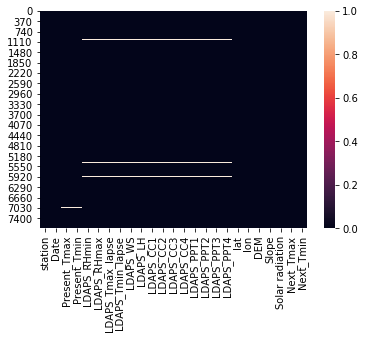

In [11]:
#checking null values
sns.heatmap(tem.isnull())

In [13]:
# checking unique values in the dataset

col_name=[]
uni_name=[]
table=pd.DataFrame([])
for i in tem.columns:
    col_name.append(str(i))
    uni_name.append(tem[i].nunique())


table['columns']=col_name
table['No. of counts']=uni_name

table

,columns,No. of counts
0,station,25
1,Date,310
2,Present_Tmax,167
3,Present_Tmin,155
4,LDAPS_RHmin,7672
5,LDAPS_RHmax,7664
6,LDAPS_Tmax_lapse,7675
7,LDAPS_Tmin_lapse,7675
8,LDAPS_WS,7675
9,LDAPS_LH,7675


In [3]:
#lets check the value counts for those who are having null values
for i in ['station','Date','Present_Tmax','Present_Tmin','LDAPS_RHmin','LDAPS_RHmax','LDAPS_Tmax_lapse','LDAPS_Tmin_lapse','LDAPS_WS','LDAPS_LH','LDAPS_CC1','LDAPS_CC2','LDAPS_CC3','LDAPS_CC4','LDAPS_PPT1','LDAPS_PPT2','LDAPS_PPT3','LDAPS_PPT4','lat','lon','DEM','Slope','Solar radiation','Next_Tmax','Next_Tmin']:
    print(tem[i].value_counts())



25.0    310
12.0    310
2.0     310
3.0     310
4.0     310
5.0     310
6.0     310
7.0     310
8.0     310
9.0     310
10.0    310
11.0    310
13.0    310
23.0    310
14.0    310
15.0    310
16.0    310
18.0    310
20.0    310
22.0    310
24.0    310
17.0    310
19.0    310
21.0    310
1.0     310
Name: station, dtype: int64
2015-08-22    25
2015-08-19    25
2017-08-27    25
2014-07-03    25
2016-08-24    25
              ..
2016-08-29    25
2013-07-07    25
2013-07-30    25
2016-08-19    25
2016-07-30    25
Name: Date, Length: 310, dtype: int64
31.4    112
29.4    111
29.1    108
29.7    107
30.6    105
       ... 
36.4      1
20.7      1
20.4      1
20.3      1
21.2      1
Name: Present_Tmax, Length: 167, dtype: int64
24.0    161
23.8    153
23.1    144
23.5    143
23.3    142
       ... 
13.5      1
15.0      1
13.6      1
14.2      1
29.6      1
Name: Present_Tmin, Length: 155, dtype: int64
51.810596    2
71.658089    2
77.030350    2
98.524734    2
19.794666    2
            ..
4

In [4]:
tem[tem.isnull().any(axis=1)]

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
225,1.0,2013-07-09,NaN,NaN,70.051193,99.668961,27.872808,22.907420,11.017837,44.002020,...,0.036680,0.000000,0.000000,37.6046,126.991,212.3350,2.785000,5925.883789,23.4,22.0
271,22.0,2013-07-10,NaN,NaN,72.196007,95.168205,28.097980,24.510159,8.374849,38.782242,...,0.007261,0.000000,0.000000,37.5102,127.086,21.9668,0.133200,5772.487305,26.1,24.1
300,1.0,2013-07-12,NaN,NaN,95.027298,99.209839,24.078120,21.866817,8.543768,9.371270,...,5.055660,1.347418,0.980052,37.6046,126.991,212.3350,2.785000,5893.265625,23.2,20.5
450,1.0,2013-07-18,NaN,NaN,60.891193,94.747780,29.195536,23.236973,10.881031,79.349271,...,0.000000,0.000000,0.057358,37.6046,126.991,212.3350,2.785000,5812.293457,27.6,21.8
464,15.0,2013-07-18,NaN,NaN,52.795406,83.902847,31.480089,25.607262,8.995135,26.022306,...,0.000000,0.000000,0.008702,37.5507,126.937,30.0464,0.855200,5681.875000,30.7,23.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7629,5.0,2017-08-26,NaN,NaN,43.755058,83.340240,25.842338,18.532986,4.926595,97.230757,...,0.000000,0.000000,0.000000,37.5507,127.135,35.0380,0.505500,4602.118164,26.1,17.9
7682,8.0,2017-08-28,26.3,18.1,29.959215,90.116638,23.135079,17.282587,9.292264,75.430868,...,0.000000,0.000000,0.000000,37.4697,126.910,52.5180,1.562900,4518.488770,NaN,NaN
7707,8.0,2017-08-29,NaN,NaN,44.392651,75.728195,22.223247,15.954970,4.764492,37.786237,...,0.000000,0.000000,0.000000,37.4697,126.910,52.5180,1.562900,4478.937012,23.1,16.3
7750,NaN,NaN,20.0,11.3,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,...,0.000000,0.000000,0.000000,37.4562,126.826,12.3700,0.098475,4329.520508,17.4,11.3


In [5]:
for i in ['Present_Tmax','Present_Tmin','LDAPS_RHmin', 'LDAPS_RHmax', 'LDAPS_Tmax_lapse','LDAPS_Tmin_lapse','LDAPS_WS','LDAPS_LH','LDAPS_CC1','LDAPS_CC2','LDAPS_CC3','LDAPS_CC4','LDAPS_PPT1','LDAPS_PPT2','LDAPS_PPT3','LDAPS_PPT4','Next_Tmax','Next_Tmin']:
    tem[i]=tem[i].fillna(tem[i].mean())

In [6]:
#for station and date
tem=tem.dropna(axis=0)

In [7]:
tem.isnull().sum()

station             0
Date                0
Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            0
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
lat                 0
lon                 0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmax           0
Next_Tmin           0
dtype: int64

In [8]:
#converting the date format from object to date
tem['Date']=pd.to_datetime(tem['Date'])
tem['Date']

0      2013-06-30
1      2013-06-30
2      2013-06-30
3      2013-06-30
4      2013-06-30
          ...    
7745   2017-08-30
7746   2017-08-30
7747   2017-08-30
7748   2017-08-30
7749   2017-08-30
Name: Date, Length: 7750, dtype: datetime64[ns]

### statistical analysis

In [9]:
tem.describe()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
count,7750.000000,7750.000000,7750.000000,7750.000000,7750.000000,7750.000000,7750.000000,7750.000000,7750.000000,7750.000000,...,7750.000000,7750.000000,7750.000000,7750.000000,7750.000000,7750.000000,7750.000000,7750.000000,7750.000000,7750.000000
mean,13.000000,29.768461,23.225736,56.758753,88.377102,29.613841,23.512993,7.096514,62.495367,0.368744,...,0.482338,0.276227,0.267328,37.544720,126.991400,61.854944,1.256692,5341.549330,30.275435,22.932835
std,7.211568,2.953516,2.398327,14.585101,7.149011,2.928357,2.330881,2.166519,33.516382,0.261096,...,1.737965,1.142722,1.185994,0.050335,0.079406,54.256953,1.369833,428.996445,3.117994,2.478851
min,1.000000,20.000000,11.300000,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,0.000000,...,0.000000,0.000000,0.000000,37.456200,126.826000,12.370000,0.098500,4329.520508,17.400000,11.300000
25%,7.000000,27.800000,21.700000,46.048225,84.318649,27.693733,22.115268,5.686498,37.547426,0.148339,...,0.000000,0.000000,0.000000,37.510200,126.937000,28.700000,0.271300,4999.018555,28.200000,21.400000
50%,13.000000,29.900000,23.400000,55.313244,89.699505,29.662273,23.735942,6.563068,57.310630,0.320110,...,0.000000,0.000000,0.000000,37.550700,126.995000,45.716000,0.618000,5436.345215,30.500000,23.100000
75%,19.000000,32.000000,24.875000,67.032715,93.703491,31.682567,25.133460,8.005363,83.891182,0.571665,...,0.024224,0.009685,0.000686,37.577600,127.042000,59.832400,1.767800,5728.316406,32.600000,24.600000
max,25.000000,37.600000,29.900000,98.524734,100.000153,38.542255,29.619342,21.857621,213.414006,0.967277,...,21.621661,15.841235,16.655469,37.645000,127.135000,212.335000,5.178200,5992.895996,38.900000,29.800000


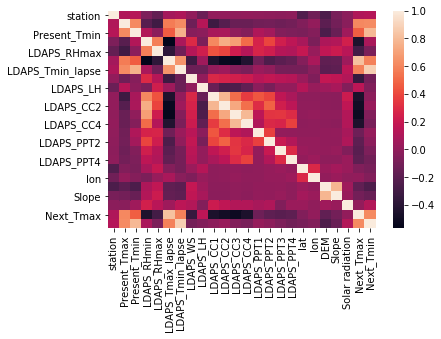

In [10]:
sns.heatmap(tem.corr())

In [12]:
tem.corr()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
station,1.000000,0.112786,0.131922,-0.066796,-0.167196,0.069223,0.104911,0.005294,-0.133575,0.006922,...,-0.008328,-0.012609,-0.010529,-0.237610,-0.118763,-0.255970,-0.090113,-0.019011,0.108155,0.128539
Present_Tmax,0.112786,1.000000,0.617699,-0.207063,-0.304833,0.568958,0.622538,-0.125517,0.133333,-0.313699,...,-0.104792,-0.126706,-0.105768,-0.054132,0.007527,-0.188779,-0.107333,-0.027008,0.609320,0.621706
Present_Tmin,0.131922,0.617699,1.000000,0.120862,-0.018417,0.462182,0.762218,-0.038555,-0.012366,0.082934,...,0.064422,-0.051820,-0.068977,-0.080519,-0.045560,-0.252518,-0.148300,0.051659,0.469904,0.795860
LDAPS_RHmin,-0.066796,-0.207063,0.120862,1.000000,0.578472,-0.568528,0.087426,0.292438,-0.073447,0.613375,...,0.390469,0.238624,0.165641,0.085909,-0.077696,0.100944,0.122597,0.243102,-0.441382,0.092732
LDAPS_RHmax,-0.167196,-0.304833,-0.018417,0.578472,1.000000,-0.377319,-0.117110,0.133479,0.237121,0.436177,...,0.228819,0.133394,0.116427,0.194782,0.024226,0.176423,0.218953,0.147954,-0.287324,-0.075301
LDAPS_Tmax_lapse,0.069223,0.568958,0.462182,-0.568528,-0.377319,1.000000,0.652948,-0.317239,0.045198,-0.441029,...,-0.249766,-0.196162,-0.168065,-0.043896,0.089051,-0.180868,-0.164272,0.046232,0.826628,0.585410
LDAPS_Tmin_lapse,0.104911,0.622538,0.762218,0.087426,-0.117110,0.652948,1.000000,-0.133944,-0.137862,0.009424,...,-0.003375,-0.094489,-0.100741,-0.098014,-0.028430,-0.197252,-0.187627,0.158569,0.585726,0.879808
LDAPS_WS,0.005294,-0.125517,-0.038555,0.292438,0.133479,-0.317239,-0.133944,1.000000,0.002215,0.288147,...,0.183573,0.152102,0.134116,0.034599,-0.061801,0.189109,0.169553,0.120288,-0.347854,-0.100688
LDAPS_LH,-0.133575,0.133333,-0.012366,-0.073447,0.237121,0.045198,-0.137862,0.002215,1.000000,-0.149353,...,-0.085559,0.008335,0.012161,0.131827,0.024216,0.053375,0.085062,-0.049060,0.155309,-0.058622
LDAPS_CC1,0.006922,-0.313699,0.082934,0.613375,0.436177,-0.441029,0.009424,0.288147,-0.149353,1.000000,...,0.389690,0.166757,0.088760,-0.009048,-0.007764,-0.015091,-0.021775,0.217643,-0.455045,-0.012729


In [13]:
tem[['Present_Tmax', 'Present_Tmin', 'Next_Tmax', 'Next_Tmin']]

,Present_Tmax,Present_Tmin,Next_Tmax,Next_Tmin
0,28.7,21.4,29.1,21.2
1,31.9,21.6,30.5,22.5
2,31.6,23.3,31.1,23.9
3,32.0,23.4,31.7,24.3
4,31.4,21.9,31.2,22.5
...,...,...,...,...
7745,23.1,17.8,27.6,17.7
7746,22.5,17.4,28.0,17.1
7747,23.3,17.1,28.3,18.1
7748,23.3,17.7,28.6,18.8


In [15]:
#Extracting the actual temperature except first 25 values ie from index 25 we will extract
Actualmax=pd.DataFrame(tem['Present_Tmax'].iloc[25:])
Actualmin=pd.DataFrame(tem['Present_Tmin'].iloc[25:])
Actualmax=Actualmax.reset_index(drop=True)
Actualmin=Actualmin.reset_index(drop=True)

In [17]:
#Extracting the predicted temperature except last 25 values ie from first till 7726 we will extract
predictedmax=pd.DataFrame(tem['Next_Tmax'].iloc[0:7726])
predictedmin=pd.DataFrame(tem['Next_Tmin'].iloc[0:7726])
predictedmax=predictedmax.reset_index(drop=True)
predictedmin=predictedmin.reset_index(drop=True)

In [18]:
#This will calculate the difference or error in predicting the max temp and min temp
Error_max_temp=predictedmax.iloc[:,0]-Actualmax.iloc[:,0] 
Error_min_temp=predictedmin.iloc[:,0]-Actualmin.iloc[:,0]

In [19]:
Actualmax.iloc[:,0]

0       28.3
1       30.5
2       30.3
3       31.0
4       30.8
        ... 
7720    23.1
7721    22.5
7722    23.3
7723    23.3
7724    23.2
Name: Present_Tmax, Length: 7725, dtype: float64

In [20]:
print(Error_max_temp)
print()
print(Error_min_temp)

0       0.8
1       0.0
2       0.8
3       0.7
4       0.4
       ... 
7721    0.5
7722    0.5
7723    0.7
7724    0.6
7725    NaN
Length: 7726, dtype: float64

0       0.0
1      -0.4
2      -0.6
3      -0.2
4      -0.1
       ... 
7721   -0.1
7722   -0.1
7723   -0.1
7724    0.0
7725    NaN
Length: 7726, dtype: float64


In [21]:
#The Root mean square error of predicting the maximum temperature for the next day
Root_mean_square_Error_max=(((Error_max_temp)**2).mean())**1/2

Root_mean_square_Error_max

0.438474210365359

In [22]:
#The Root mean square error of predicting the minimum temperature for the next day
Root_mean_square_Error_min=(((Error_min_temp)**2).mean())**1/2
Root_mean_square_Error_min

0.16379211374211497

##### Observations
we can observe that Root mean square error of minimum temperature is lower than the maximum temperature , so we can conclude that the predictions of minimum temperature were better than the maximum temperature. 

##### Checking the distribution of data

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1152310d0>,
      dtype=object)

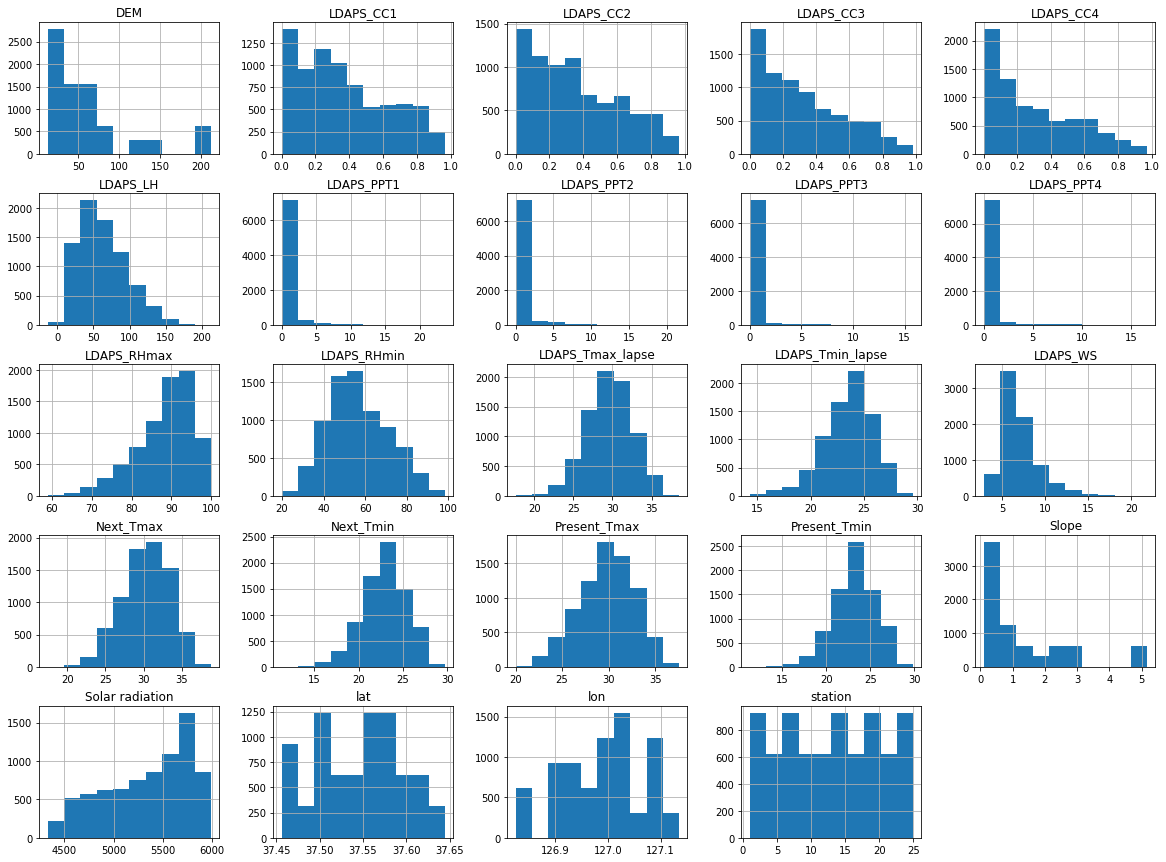

In [25]:
tem.hist(figsize=(20,15))
#Most of the columns are symmetric

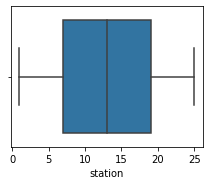

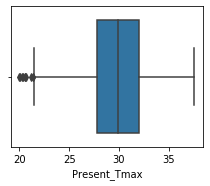

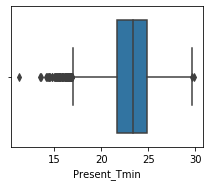

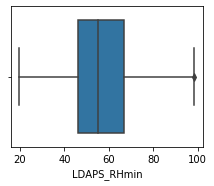

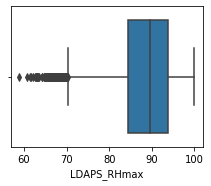

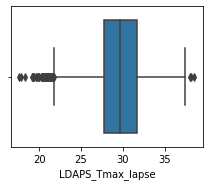

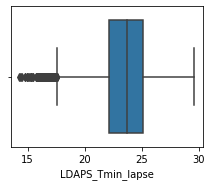

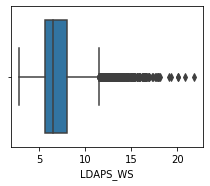

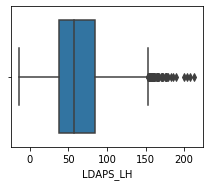

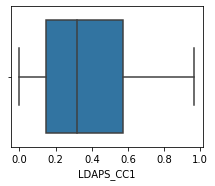

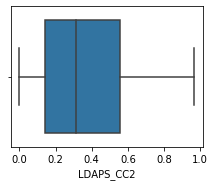

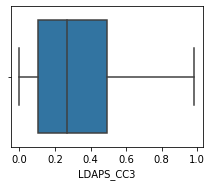

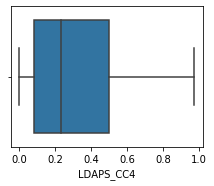

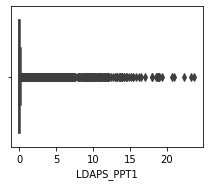

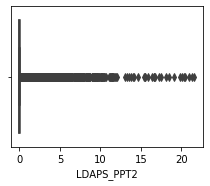

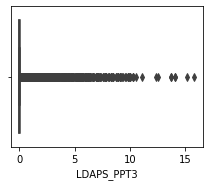

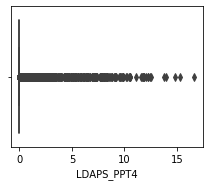

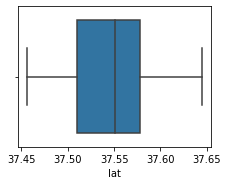

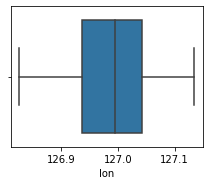

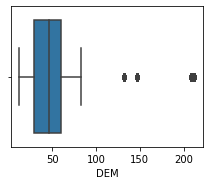

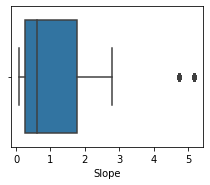

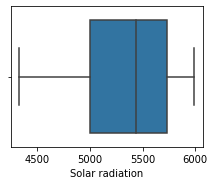

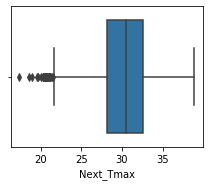

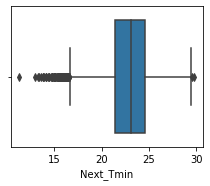

In [26]:
# checking outliers
col_list=['station', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin',
       'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS',
       'LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4',
       'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon',
       'DEM', 'Slope', 'Solar radiation', 'Next_Tmax', 'Next_Tmin']
for i in col_list:
    plt.figure(figsize=(20,15))
    plt.subplot(5,5,5)
    sns.boxplot(tem[i])

#### Label Encoding

In [28]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
tem['Date']=lb.fit_transform(tem['Date']) #.astype(str))

In [29]:
tem.head()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,0,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,0,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,0,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,0,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,0,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5


In [30]:
tem=tem.drop('station',axis=1) #dropping station as it is only for identifying the station

In [31]:
tem.head()

,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,0,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,...,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,0,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,...,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,0,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,...,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,0,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,...,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,0,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,...,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5


removing outliers

In [32]:
#training dataset
from scipy.stats import zscore
z=np.abs(zscore(tem))
print("The datashape before removing outliers is ", tem.shape)
tem=tem[(z<3).all(axis=1)]
print("The datashape after removing outliers is ", tem.shape)

The datashape before removing outliers is  (7750, 24)
The datashape after removing outliers is  (6888, 24)


splitting the data into input and output variables..

The training data will be split into input and output variables. The training data has two variables, Next_Tmax and Next_Tmin. We will have two targets to predict. We will build separate models for predicting two targets

In [33]:
x=tem.drop(['Next_Tmax','Next_Tmin'], axis=1)
x.shape

(6888, 22)

In [35]:
y1=pd.DataFrame(tem['Next_Tmax'])
y2=pd.DataFrame(tem['Next_Tmin'])
print(y1.shape)
print(y2.shape)

(6888, 1)
(6888, 1)


#### Checking the skewness in the datasets

In [36]:
#using sqrt function to reduce the skewness
for i in x.columns:
    if x.skew()[i]>0.55:
        x[i]=np.sqrt(x[i])

In [37]:
x.skew()
#checking the skewness again

Date                0.005349
Present_Tmax       -0.274048
Present_Tmin       -0.225739
LDAPS_RHmin         0.305363
LDAPS_RHmax        -0.687967
LDAPS_Tmax_lapse   -0.107947
LDAPS_Tmin_lapse   -0.382885
LDAPS_WS            0.734981
LDAPS_LH           -0.004968
LDAPS_CC1          -0.174941
LDAPS_CC2           0.501691
LDAPS_CC3          -0.102498
LDAPS_CC4           0.003371
LDAPS_PPT1          2.396424
LDAPS_PPT2          3.031074
LDAPS_PPT3          3.254610
LDAPS_PPT4          3.592047
lat                 0.108039
lon                -0.275324
DEM                 1.174340
Slope               0.883783
Solar radiation    -0.505080
dtype: float64

In [38]:
x.isnull().sum()
#After removing skewness, one value in LDAPS_LH has become null

Date                0
Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            1
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
lat                 0
lon                 0
DEM                 0
Slope               0
Solar radiation     0
dtype: int64

In [39]:
x[x.isnull().any(axis=1)]
#checking which row has null value

,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation
6244,249,29.4,22.0,92.217072,99.999008,24.909289,22.697208,3.266631,NaN,0.976853,...,0.948993,1.775553,0.616715,0.720871,1.460785,37.6181,127.004,12.105949,2.174764,5926.908691


In [40]:
#replacing the null value it with the column mean value
x=x.fillna(x['LDAPS_LH'].mean())

#### Scaling the data

In [41]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x))
x.head()

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,-1.751275,-0.434229,-0.828313,0.192637,0.437422,-0.663279,-0.291150,0.039562,0.353317,-0.236411,...,-0.428167,-0.474679,-0.420385,-0.401963,-0.359205,1.215021,0.002447,2.500311,1.286282,1.552140
1,-1.751275,0.687209,-0.741633,-0.241178,0.363364,-0.013229,0.172937,-0.631017,-0.166881,-0.274050,...,-0.446464,-0.474679,-0.420385,-0.401963,-0.359205,1.215021,0.516937,-0.187300,-0.465665,1.257982
2,-1.751275,0.582074,-0.004851,-0.499842,-0.596469,0.074807,0.412468,-0.358138,-1.399747,-0.348164,...,-0.365862,-0.474679,-0.420385,-0.401963,-0.359205,0.674208,0.843199,-0.500783,-0.835922,1.244279
3,-1.751275,0.722254,0.038489,0.191486,1.214323,-0.066672,-0.147040,-0.657137,0.248749,-0.315600,...,-0.409422,-0.474679,-0.420385,-0.401963,-0.359205,2.024238,0.391451,-0.163126,1.145058,1.228591
4,-1.751275,0.511985,-0.611613,0.041939,0.298287,-0.282806,-0.074677,-0.604202,1.302713,-0.640712,...,-0.220569,-0.474679,-0.420385,-0.401963,-0.359205,0.135398,1.809436,-0.450283,-0.476750,1.234750


## Part - 1 Predicting Next_Tmax (y1)

In [42]:
#Checking the best random state for finalising the train and test data
#importing necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

def max_r2_score(reg,x,y1):
    max_r2score=0
    for r_state in range(42,101):
        train_x,test_x,train_y1,test_y1=train_test_split(x,y1,random_state=r_state,test_size=0.20)
        reg.fit(train_x,train_y1)
        pred=reg.predict(test_x)
        r2score=r2_score(test_y1,pred)
        if r2score>max_r2score:
            max_r2score=r2score
            final_r_state=r_state
    print("The maximum r2 score", max_r2score, "is achieved at random state", final_r_state)

In [43]:
lr=LinearRegression()
max_r2_score(lr,x,y1)

The maximum r2 score 0.7697840199902874 is achieved at random state 43


In [44]:
train_x,test_x,train_y1,test_y1=train_test_split(x,y1,random_state=43,test_size=0.20)

In [45]:
#Let us check the performances of other models and to derive at the best parameters for the models, let us use Gridsearchcv
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
kn=KNeighborsRegressor()
parameters={'n_neighbors':(1,10)}
gdk=GridSearchCV(kn,parameters)
gdk.fit(train_x,train_y1)
gdk.best_params_

{'n_neighbors': 10}

In [46]:
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor()
parameters={'criterion':('mse','friedman_mse','mae')}
gdd=GridSearchCV(dt,parameters)
gdd.fit(train_x,train_y1)
gdd.best_params_

{'criterion': 'mse'}

In [47]:
from sklearn.svm import SVR
sv=SVR()
parameters={'kernel':('linear','rbf'), 'C':[1,10]}
gdsr=GridSearchCV(sv,parameters)
gdsr.fit(train_x,train_y1)
gdsr.best_params_

{'C': 10, 'kernel': 'rbf'}

In [48]:
score=[]
cv=[]
Mean=[]
Root=[]

from sklearn.model_selection import cross_val_score

models=[LinearRegression(),KNeighborsRegressor(n_neighbors=10),DecisionTreeRegressor(criterion='mse'),SVR(C=10,kernel='rbf')]

for i in models:
    i.fit(train_x,train_y1)
    pred=i.predict(test_x)
    print(i)
    r2score=r2_score(test_y1,pred)
    score.append(r2score)
    print("The r2 score is", r2score)
    cscore=cross_val_score(i,x,y1,scoring='r2').mean()
    cv.append(cscore)
    print("The cross val score is", cscore)
    meanerror=mean_squared_error(test_y1,pred)
    Mean.append(meanerror)
    print("The mean squared error is", meanerror)
    rooterror=np.sqrt(meanerror)
    print("The root mean squared error is", rooterror)
    Root.append(rooterror)
    print("\n")
    print("\n")



LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
The r2 score is 0.7697840199902874
The cross val score is 0.6380122575640932
The mean squared error is 1.9808254514474644
The root mean squared error is 1.40741800878327




KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                    weights='uniform')
The r2 score is 0.8631542904939347
The cross val score is 0.5289650068885023
The mean squared error is 1.1774485172556841
The root mean squared error is 1.08510299845484




DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, spl

In [49]:
result=pd.DataFrame({'Model':['LinearRegression','KNeighborsRegressor', 'DecisionTreeRegressor', 'SVR'],'R2score':score,'Cross_val_score':cv,'Mean Squared Error':Mean, 'Root Mean Squared Error': Root})
result

,Model,R2score,Cross_val_score,Mean Squared Error,Root Mean Squared Error
0,LinearRegression,0.769784,0.638012,1.980825,1.407418
1,KNeighborsRegressor,0.863154,0.528965,1.177449,1.085103
2,DecisionTreeRegressor,0.797539,0.372456,1.742017,1.319855
3,SVR,0.922481,0.573691,0.666988,0.816693


In [50]:
#Let us try to use ensemble techniques
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor

#### Random Forest Regressor

In [51]:
#Selecting the best parameters using GridSearchCV
rf=RandomForestRegressor()
parameters={'n_estimators':(50,100,200,500)}
gdrf=GridSearchCV(rf,parameters)
gdrf.fit(train_x,train_y1)
gdrf.best_params_

{'n_estimators': 200}

In [52]:
#Lets check the r2 score 
rf=RandomForestRegressor(n_estimators=200)
max_r2_score(rf,x,y1)

The maximum r2 score 0.908810039358035 is achieved at random state 94


In [53]:
#Let us check the cross val score for RandomForest
cross=cross_val_score(rf,x,y1,cv=5,scoring='r2').mean()
print("The cross val score is", cross)

The cross val score is 0.6547200480140096


In [54]:
result2=pd.DataFrame({'Boosters':['RandomForestRegressor','GradientBoostRegressor','AdaBoostRegressor'],'R2 Score':[0.901,0.927,0.734],'Cross_val_score':[0.655,0.662,0.621]})
result2

,Boosters,R2 Score,Cross_val_score
0,RandomForestRegressor,0.901,0.655
1,GradientBoostRegressor,0.927,0.662
2,AdaBoostRegressor,0.734,0.621


In [55]:
result

,Model,R2score,Cross_val_score,Mean Squared Error,Root Mean Squared Error
0,LinearRegression,0.769784,0.638012,1.980825,1.407418
1,KNeighborsRegressor,0.863154,0.528965,1.177449,1.085103
2,DecisionTreeRegressor,0.797539,0.372456,1.742017,1.319855
3,SVR,0.922481,0.573691,0.666988,0.816693


In [56]:
#GradientBoostingRegressor is giving the better scores. So we can finalise the same
train_x,test_x,train_y1,test_y1=train_test_split(x,y1,random_state=46,test_size=0.20)
gb=GradientBoostingRegressor(n_estimators=500,learning_rate=0.1)
gb.fit(train_x,train_y1)
pred=gb.predict(test_x)
r2score=r2_score(test_y1,pred)
cv=cross_val_score(gb,x,y1,cv=5,scoring='r2').mean()
print("The accuracy score is", r2score)
print("The cross val score is", cv)

The accuracy score is 0.9253314494777918
The cross val score is 0.6636534382919804


In [57]:
from sklearn.externals import joblib
joblib.dump(gb,"Project17_first prediction_Temperature_Forecast.pkl")

['Project17_first prediction_Temperature_Forecast.pkl']

## Part - 2 Predicting Next_Tmin (y2)

In [58]:
#Checking the best random state for finalising the train and test data
#importing necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

def max_r2_score(reg,x,y2):
    max_r2score=0
    for r_state in range(42,101):
        train_x,test_x,train_y2,test_y2=train_test_split(x,y2,random_state=r_state,test_size=0.20)
        reg.fit(train_x,train_y2)
        pred=reg.predict(test_x)
        r2score=r2_score(test_y2,pred)
        if r2score>max_r2score:
            max_r2score=r2score
            final_r_state=r_state
    print("The maximum r2 score", max_r2score, "is achieved at random state", final_r_state)

In [59]:
lr=LinearRegression()
max_r2_score(lr,x,y2)

The maximum r2 score 0.8272085418820303 is achieved at random state 85


In [60]:
train_x,test_x,train_y2,test_y2=train_test_split(x,y2,random_state=85,test_size=0.20)

In [61]:
#Let us check the performances of other models and to derive at the best parameters for the models, let us use Gridsearchcv
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
kn=KNeighborsRegressor()
parameters={'n_neighbors':(1,10)}
gdk=GridSearchCV(kn,parameters)
gdk.fit(train_x,train_y2)
gdk.best_params_

{'n_neighbors': 10}

In [62]:
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor()
parameters={'criterion':('mse','friedman_mse','mae')}
gdd=GridSearchCV(dt,parameters)
gdd.fit(train_x,train_y2)
gdd.best_params_

{'criterion': 'friedman_mse'}

In [63]:
from sklearn.svm import SVR
sv=SVR()
parameters={'kernel':('linear','rbf'), 'C':[1,10]}
gdsr=GridSearchCV(sv,parameters)
gdsr.fit(train_x,train_y2)
gdsr.best_params_

{'C': 10, 'kernel': 'rbf'}

In [64]:
score=[]
cv=[]
Mean=[]
Root=[]

from sklearn.model_selection import cross_val_score

models=[LinearRegression(),KNeighborsRegressor(n_neighbors=10),DecisionTreeRegressor(criterion='friedman_mse'),SVR(C=10,kernel='rbf')]

for i in models:
    i.fit(train_x,train_y2)
    pred=i.predict(test_x)
    print(i)
    r2score=r2_score(test_y2,pred)
    score.append(r2score)
    print("The r2 score is", r2score)
    cscore=cross_val_score(i,x,y2,scoring='r2').mean()
    cv.append(cscore)
    print("The cross val score is", cscore)
    meanerror=mean_squared_error(test_y2,pred)
    Mean.append(meanerror)
    print("The mean squared error is", meanerror)
    rooterror=np.sqrt(meanerror)
    print("The root mean squared error is", rooterror)
    Root.append(rooterror)
    print("\n")
    print("\n")



LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
The r2 score is 0.8272085418820303
The cross val score is 0.752111505068578
The mean squared error is 0.9532700017844185
The root mean squared error is 0.976355468968356




KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                    weights='uniform')
The r2 score is 0.8783706570055045
The cross val score is 0.6144060721456678
The mean squared error is 0.6710146744304976
The root mean squared error is 0.8191548537550746




DecisionTreeRegressor(ccp_alpha=0.0, criterion='friedman_mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_stat

In [65]:
result=pd.DataFrame({'Model':['LinearRegression','KNeighborsRegressor', 'DecisionTreeRegressor', 'SVR'],'R2score':score,'Cross_val_score':cv,'Mean Squared Error':Mean, 'Root Mean Squared Error': Root})
result

,Model,R2score,Cross_val_score,Mean Squared Error,Root Mean Squared Error
0,LinearRegression,0.827209,0.752112,0.953270,0.976355
1,KNeighborsRegressor,0.878371,0.614406,0.671015,0.819155
2,DecisionTreeRegressor,0.778521,0.554272,1.221871,1.105383
3,SVR,0.939291,0.650802,0.334924,0.578726


In [66]:
#Let us try to use ensemble techniques
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor

In [67]:
#Selecting the best parameters using GridSearchCV
rf=RandomForestRegressor()
parameters={'n_estimators':(50,100,200,500)}
gdrf=GridSearchCV(rf,parameters)
gdrf.fit(train_x,train_y2)
gdrf.best_params_

{'n_estimators': 500}

In [68]:
#Lets check the r2 score 
rf=RandomForestRegressor(n_estimators=500)
max_r2_score(rf,x,y2)

The maximum r2 score 0.9118359599768004 is achieved at random state 45


In [73]:
#Let us check the cross val score for RandomForest
cross=cross_val_score(rf,x,y2,cv=5,scoring='r2').mean()
print("The cross val score is", cross)

The cross val score is 0.7686268991703946


#### GradientBoostingRegressor

In [74]:
#selecting the best parameters 
gb=GradientBoostingRegressor()
parameters={'learning_rate':(0.001,0.01,0.1,1), 'n_estimators':(10,50,100,500)}
gdg=GridSearchCV(gb,parameters)                                                                                                                                        
gdg.fit(train_x,train_y2)                                                                                                                                         
gdg.best_params_

{'learning_rate': 0.1, 'n_estimators': 500}

In [75]:
#Lets check the r2 score 
gb=GradientBoostingRegressor(n_estimators=500,learning_rate=0.1)
max_r2_score(gb,x,y2)

The maximum r2 score 0.9357999086311204 is achieved at random state 84


In [76]:
#Let us check the cross val score for GradientBoosting
cross=cross_val_score(gb,x,y2,cv=5,scoring='r2').mean()
print("The cross val score is", cross)

The cross val score is 0.6704023420152792


AdaBoostRegressor

In [77]:
#selecting the best parameters
ad=AdaBoostRegressor()
parameters={'n_estimators':(10,50,100,200,500),'learning_rate':(0.001,0.01,0.1,1)}
gad=GridSearchCV(ad,parameters)
gad.fit(train_x,train_y2)
gad.best_params_

{'learning_rate': 1, 'n_estimators': 200}

In [78]:
#Lets check the r2 score 
ad=AdaBoostRegressor(n_estimators=200,learning_rate=1)
max_r2_score(ad,x,y2)

The maximum r2 score 0.8039012838352972 is achieved at random state 99


In [79]:
#Let us check the cross val score for Adaboost
cross=cross_val_score(ad,x,y2,cv=5,scoring='r2').mean()
print("The cross val score is", cross)

The cross val score is 0.7229918561282579


In [80]:
result2=pd.DataFrame({'Boosters':['RandomForestRegressor','GradientBoostRegressor','AdaBoostRegressor'],'R2 Score':[0.911,0.935,0.803],'Cross_val_score':[0.768,0.670,0.722]})
result2

,Boosters,R2 Score,Cross_val_score
0,RandomForestRegressor,0.911,0.768
1,GradientBoostRegressor,0.935,0.670
2,AdaBoostRegressor,0.803,0.722


In [81]:
result

,Model,R2score,Cross_val_score,Mean Squared Error,Root Mean Squared Error
0,LinearRegression,0.827209,0.752112,0.953270,0.976355
1,KNeighborsRegressor,0.878371,0.614406,0.671015,0.819155
2,DecisionTreeRegressor,0.778521,0.554272,1.221871,1.105383
3,SVR,0.939291,0.650802,0.334924,0.578726


In [82]:
train_x,test_x,train_y2,test_y2=train_test_split(x,y2,random_state=45,test_size=0.20)
gb=GradientBoostingRegressor(n_estimators=500,learning_rate= 0.1)
gb.fit(train_x,train_y2)
pred=gb.predict(test_x)
r2score=r2_score(test_y2,pred)
cv=cross_val_score(gb,x,y2,cv=5,scoring='r2').mean()
print("The accuracy score is", r2score)
print("The cross val score is", cv)

The accuracy score is 0.935324742285355
The cross val score is 0.6630322376692007


In [ ]:
from sklearn.externals import joblib
joblib.dump(gb,"Project17_second prediction_Temperature_Forecast.pkl")